# 机器学习实验报告
## Lab2：Regression Model
- 姓名：周钰宸
- 学号：2111408
- 专业：信息安全

## 1 实验要求
### 1.1 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
1. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 1.2 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。


### 1.3 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

## 2 实验原理

### 2.1 线性回归模型
在线性回归中，我们研究变量之间的关系：一个是自变量（或称特征，可能一个或多个）和一个因变量（或称响应）。最后目的是**拟合一个假设（或者是预测函数），能够利用给定特征对因变量进行较高的预测。**

在这个过程中，需要使用**损失函数**，常用MSE进行指导。即在优化过程中通过一系列优化方法，目的是使**训练集的损失函数最小**。常用的优化方式有解析解、梯度下降等。

而常用的线性回归模型分为一元或者多元线性回归，区别就在于自变量的个数。

### 2.2 梯度下降
由于解析解的方式仅适用于数据量较小的情况，因此更常用的方式就是采用**梯度下降的方式。**

以一个**学习率**（即步长，不能过大或过小，常用3或者10倍进行变化）为变化，不断地更新回归参数，最基础的理论依据就是**根据梯度下降求最优解的原理。**

常用的梯度下降分为**批量梯度和随机梯度**下降两种方式，区别就是前者是求取的全局最优解，但是会随着容量增大而性能下降；后者取其的是局部最优解，缺点就是很可能会受到影响，对全局最优解难以求取。


### 2.3 数据预处理
* 归一化 (又称Min-Max Scaling)：通过缩放数据使其落入一个给定的最小和最大范围内（通常是[0,1]）。这种变换改变了数据的尺度，但不改变其形状或数据在空间中的相对位置。
 
适用情况：当数据不遵循正态分布，或者当特征的最小和最大值的范围已知且有限时。
* 标准化 (又称Z-score Normalization)：对数据进行缩放和移动，使其均值为0，标准差为1。这不仅改变了数据的尺度，还改变了其分布。但数据在空间中的相对位置保持不变。

适用情况：当数据的分布大致为正态分布时，标准化是一个很好的选择。
* 去中心化：对数据的一种平移变换，使其均值为0，但是没有改变数据在空间中的相对位置。

适用情况：主要用于去除数据的均值偏差，但不关心数据的尺度。

## 3 实验流程

### 3.1 数据预处理
#### 导入所需要的包

In [1]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
"""
@Project ：PythonProject
@File    ：main.py
@IDE     ：PyCharm
@Author  ：ErwinZhou
@Date    ：2023/10/18 19:06
"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import trange
# ---初级要求---
# ---中级要求---
# ---高级要求---

#### 判断数据分布

即为了在**划分数据集是保证数据分的一致性，保持样本类别比例相似**，首先对所给定的数据内容进行一定分析，**首先判断其标签或者说输出向量的取值范围。**

In [2]:
def data_distribution(data):
    """
    @todo Discover the distributive pattern of given data to judge if there is a need for the "stratify" argument
    @param data: given data
    @return: none
    """
    variance_val = np.var(data)  # variance
    std_deviation = np.std(data)  # std_variance
    print("Variance:", variance_val)
    print("Standard Deviation:", std_deviation)

filepath = 'winequality-white.csv'
# 获取数据大小
data = pd.read_csv(filepath)
print("Data dimension:{0}".format(data.shape))
print(data)

# 获取标签范围
quality_values = data['quality'].unique()
quality_range = (min(quality_values), max(quality_values))
print("WineQuality-white has a y range:{0}".format(quality_range))


Data dimension:(4898, 12)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

 

由此可知其数据大小为4896×12，最后一列即输出向量的取值范围为[3,9]。

使用**方差与标准差**两个指标，首先输出其标签若均匀分布情况的两个指标取值，再与实际情况对比。

In [3]:
b = 9 # 红酒的取值最大值为9
a = 3 # 最小值为3
ideal_variance = ((b - a + 1) ** 2 - 1) / 12 # 若均匀分布的理想方差，
ideal_std_deviation = np.sqrt(ideal_variance)
print("ideal_variance:{0}".format(ideal_variance))
print("ideal_std_deviation:{0}".format(ideal_std_deviation))
# 输出实际分布的方差和标准差以及均值
print("Mean:")
data_distribution(data.iloc[:,-1])

ideal_variance:4.0
ideal_std_deviation:2.0
Mean:
Variance: 0.7841955475197752
Standard Deviation: 0.8855481621683685


可以看到数据的实际分布方差和理想方差相差还是很大的，因此需要采用**分层抽样的方式**保证数据分布各类别的比例相似。

**数据预处理**

数据预处理的核心目的是**减少方差大的特征的影响，使模型更准确，并加快学习算法的收敛速度。**

先以pH特征为例，查看一下原始数据的分布情况:

Mean of feature pH:3.1882666394446715
Variance: 0.02279652588176503
Standard Deviation: 0.1509851843121206


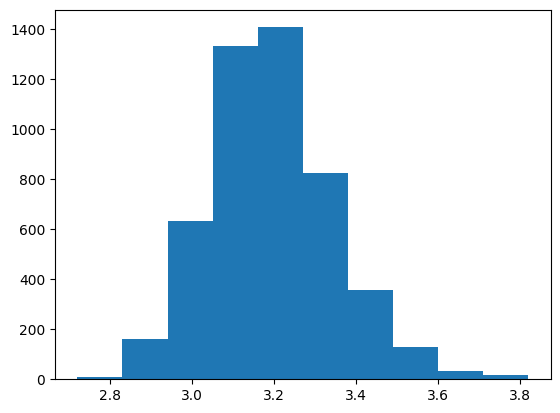

In [4]:
print("Mean of feature pH:{0}".format(np.mean(data["pH"])))
data_distribution(data["pH"])
plt.hist(data["pH"])
plt.show()

可以发现初始数据就比较接近正态分布，这提示我们**可以使用标准化或者归一化的方法。** 但一般情况下数据并非一定是正态的。

**接下来分别采用三种方式进行数据预处理并可视化对比结果：**

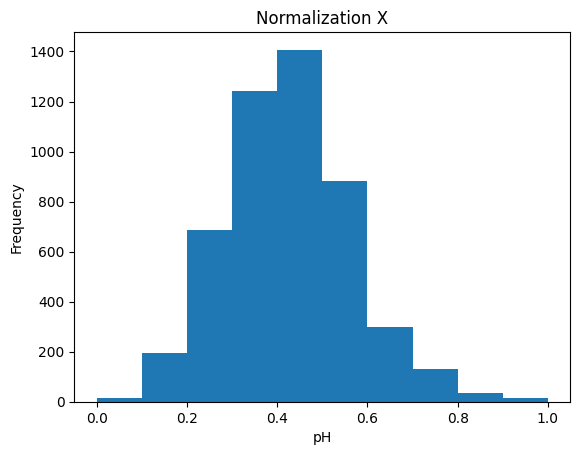

Variance: 0.018840104034516685
Standard Deviation: 0.13725925846556467


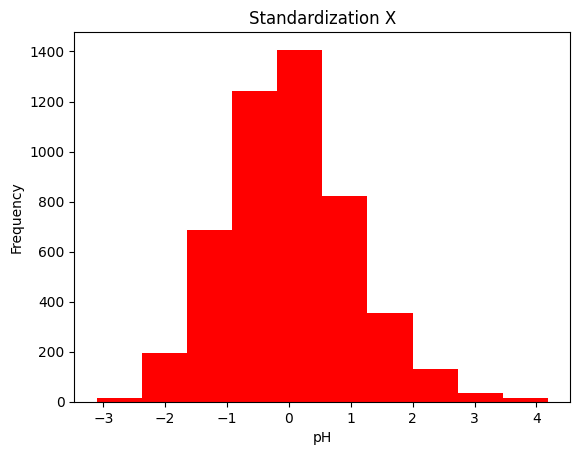

Variance: 0.9999999999999906
Standard Deviation: 0.9999999999999952


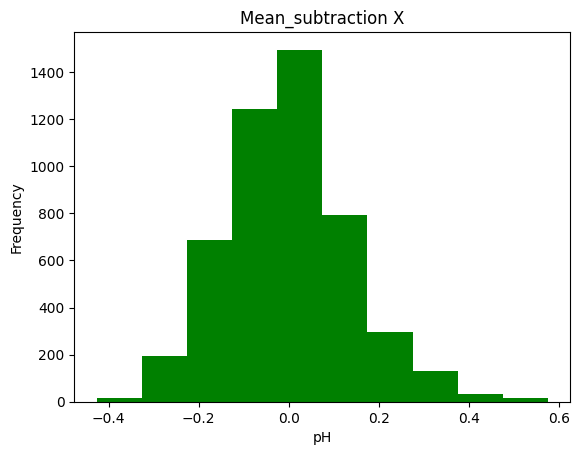

Variance: 0.018840104034516636
Standard Deviation: 0.1372592584655645


In [5]:
def normalization(mat):
    """
    @todo To prevent the model from being biased towards certain features due to differences in feature scales
    @param mat: without normalization
    @return: mat :with normalization
    """
    mat = (mat - np.min(mat,0))/(np.max(mat,0)-np.min(mat,0))
    return mat


def standardization(mat):
    """
    @todo To prevent the model from being biased towards certain features due to differences in feature scales
    @param mat: without standardization
    @return mat: with standardization
    """
    mat = (mat-np.mean(mat,0))/np.std(mat,0)
    return mat

def mean_subtraction(mat):
    """
    @todo To prevent the model from being biased towards certain features due to differences in feature scales
    @param mat: without mean_subtraction(zero_centered)
    @return mat: with mean_subtraction(zero_centered)
    """
    # for j in range(mat.shape[1]):
    #     mean = np.mean(mat[:,j])
    #     for i in range(mat.shape[0]):
    #         mat[i][j] = mat[i][j] - mean
    mat = (mat - np.mean(mat, 0)) / (np.max(mat, 0) - np.min(mat, 0))
    return mat

X=data.iloc[:,0:-1]

X_nor = normalization(X)
plt.hist(X_nor["pH"])
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title("Normalization X")
plt.show()
data_distribution(X_nor["pH"])


X_sta = standardization(X)
plt.hist(X_sta["pH"],color="red")
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title("Standardization X")
plt.show()
data_distribution(X_sta["pH"])


X_sub = mean_subtraction(X)
plt.hist(X_sub["pH"],color="green")
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title("Mean_subtraction X")
plt.show()
data_distribution(X_sub["pH"])


可以发现**三种方式都可以较好的对数据进行预处理，预处理后的数据分布都很平均。**

* 归一化：这里没有明确显示，但其实**它最重要的作用是让所有特征都尺度相统一了，这样更加合适进行处理。** 
* 标准化：由于没有明确地验证初始数据集是否符合正态分布，并且标准化其实改变了其分布，因此这里保险起见，先不使用标准化。
* 去中心化：去中心化实际上并不关心数据的尺度，这样其实没有解决我们想要让各种特征一致尺度的问题，因此不选用归一化。

因此后面首先使用**归一化的方式**，其他方式的预处理有待对比探索。

接下来为了能够更好地进行回归分析，对维度进行处理，在**特征最左边加上全为1的一列**，目的是与回归参数的维度相一致，可以直接进行相加减。并对**回归系数进行初始化。**

In [6]:
print("-----------Output Labels Y-----------")
# 获取标签输出向量
Y = data.iloc[:,-1]
print(Y)
print("-----------X Add Column------------")
# 添加列
X_nor_added_column = pd.concat([pd.DataFrame(np.ones(X_nor.shape[0]), columns=['x0']), X_nor], axis=1)
print(X_nor_added_column)

featutre_length=X_nor_added_column.shape[0]
feature_num = X_nor_added_column.shape[1]
# 随机数初始化回归参数
print("-----------W Initialization-----------")
W = np.random.randn(feature_num, 1)
print(W)

-----------Output Labels Y-----------
0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64
-----------X Add Column------------
       x0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1.0       0.307692          0.186275     0.216867        0.308282   
1     1.0       0.240385          0.215686     0.204819        0.015337   
2     1.0       0.413462          0.196078     0.240964        0.096626   
3     1.0       0.326923          0.147059     0.192771        0.121166   
4     1.0       0.326923          0.147059     0.192771        0.121166   
...   ...            ...               ...          ...             ...   
4893  1.0       0.230769          0.127451     0.174699        0.015337   
4894  1.0       0.269231          0.235294     0.216867        0.113497   
4895  1.0       0.259615          0.156863     0.114458        0.009202   
4896  1.0       0.163462

接下来进行**划分数据集：**
不再使用归一法，而是常规地将原数据集按照比例划分为训练集和测试集，默认比例为8:2。

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_nor_added_column, Y, test_size=0.2, random_state=0)
# 转为numpy.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print("X_train:{0}".format(X_train))
print("y_train:{0}".format(y_train))
print("X_test:{0}".format(X_test))
print("y_test:{0}".format(y_test))

X_train:[[1.         0.32692308 0.17647059 ... 0.46363636 0.31395349 0.40322581]
 [1.         0.15384615 0.20588235 ... 0.50909091 0.1627907  0.70967742]
 [1.         0.25961538 0.37254902 ... 0.49090909 0.44186047 0.56451613]
 ...
 [1.         0.39423077 0.24509804 ... 0.39090909 0.18604651 0.12903226]
 [1.         0.49038462 0.17647059 ... 0.37272727 0.27906977 0.4516129 ]
 [1.         0.39423077 0.42156863 ... 0.33636364 0.3372093  0.32258065]]
y_train:[5 6 7 ... 6 6 5]
X_test:[[1.         0.33653846 0.23529412 ... 0.47272727 0.23255814 0.43548387]
 [1.         0.30769231 0.2254902  ... 0.37272727 0.27906977 0.29032258]
 [1.         0.36538462 0.05882353 ... 0.31818182 0.20930233 0.4516129 ]
 ...
 [1.         0.33653846 0.09803922 ... 0.55454545 0.46511628 0.22580645]
 [1.         0.29807692 0.29411765 ... 0.25454545 0.44186047 0.24193548]
 [1.         0.28846154 0.54901961 ... 0.59090909 0.27906977 0.14516129]]
y_test:[5 6 7 8 5 4 6 5 7 5 6 7 5 5 6 5 6 5 6 6 6 7 6 5 7 8 5 5 7 5 5 5

## 3.2 基本要求
构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。.

### 解析法
$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$

直接对最小值进行计算。但是只属于小数据的部分场景。

### 批量梯度下降（BGD）

主要是以最小化MSE损失函数为目标，每次计算**样本集的全部样本。目的是得到全局最优解。**

### 随机梯度下降（SGD）
同样是以最小化MSE损失函数为目的，但是每次只使用**样本集中的一个样本来进行梯度更新。得到的解是局部最优解。**

In [8]:
class LinearRegressionModel:
    """
    LinearRegressionModel:
    Implementation of analytical_method,batch_gradient_descent
    and stochastic_gradient_descent
    """

    def __init__(
        self,
        learning_rate=0.01,
        epochs=1000,
        optimization_method="analytical",
        loss_method="mse",
    ):
        """
        @param learning_rate:
        @param epochs:
        @param optimization_method:
        @return:
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.optimization_method = optimization_method
        self.loss_method = loss_method
        self.weights = None
        self.mse_history = []

    def model(self, X):
        """
        @todo Indirectly invoke the predict method, decoupling the model prediction method, making it easier for
               future extensions
        @param X:
        @return:
        """

        return np.dot(X, self.weights).reshape(-1)

    def predict(self, X):
        """
        @todo Evoked predict method
        @param X:
        @return:
        """
        return self.model(X)

    def loss(self, X, y):
        """
        @todo Indirect evoke multi loss functions
        @param X:
        @param y:
        @return:
        """
        if self.loss_method == "mse":
            return self.mse_loss(X, y)
        # to be continued

    def mse_loss(self, X, y):
        """
        @todo MSE loss
        @param X:
        @param y:
        @return:
        """
        model_output = self.model(X)
        return np.mean(0.5 * (model_output - y) ** 2)

    def fit(self, X, y):
        """
        @todo Training method of the Model, based on parameter 'optimization_method'
              to chase the corresponding method, makes it easier for comparison
        @param X:
        @param y:
        @return:
        """
        if self.optimization_method == "batch":
            self.batch_gradient_descent(X, y)
        elif self.optimization_method == "stochastic":
            self.stochastic_gradient_descent(X, y)
        elif self.optimization_method == "analytical":
            self.analytical_method(X, y)
            mse = self.loss(X, y)  # 使用求得的权重计算MSE
            self.mse_history.append(mse)

    def analytical_method(self, X, y):
        """
        @todo Solve the weights of linear regression analytically using the normal equation.
        @param X:
        @param y:
        @return:
        """
        X_transpose = X.T
        self.weights = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
        # 将weights转为一维形状以匹配其他方法的形式
        self.weights = self.weights.reshape(-1)

    def batch_gradient_descent(self, X, y):
        """
        @todo batch_gradient_descent method of optimization
        @param X:
        @param y:
        @return:
        """
        self.weights = W.reshape(-1)
        for epoch in trange(self.epochs):
            model_output = self.model(X)
            errors = model_output - y
            dw = np.dot(X.T, errors) / len(X)
            self.weights[:11] -= self.learning_rate * dw[:11]  # w1-w11
            self.weights[0] -= self.learning_rate * np.mean(errors)  # w0
            mse = self.loss(X, y)
            self.mse_history.append(mse)

    def stochastic_gradient_descent(self, X, y):
        """
        @todo stochastic_gradient_method of optimization
        @param X:
        @param y:
        @return:
        """
        self.weights = W.reshape(-1)
        for epoch in trange(self.epochs):
            for i in range(len(X)):
                xi = np.expand_dims(X[i], axis=0)
                yi = y[i]
                model_output = self.model(xi)
                errors = model_output - yi
                dw = np.dot(xi.T, errors) / len(xi)
                self.weights[:11] -= self.learning_rate * dw[:11]  # w1-w11
                self.weights[0] -= self.learning_rate * np.mean(errors)  # w0
            mse = self.loss(X, y)
            self.mse_history.append(mse)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:21<00:00, 12.20it/s]


-----------Analytical Method-----------
MSE of analytical method while training:0.27018646974100585
MSE of analytical method while testing:0.32992267589678637
-----------Batch Gradient Descent-----------


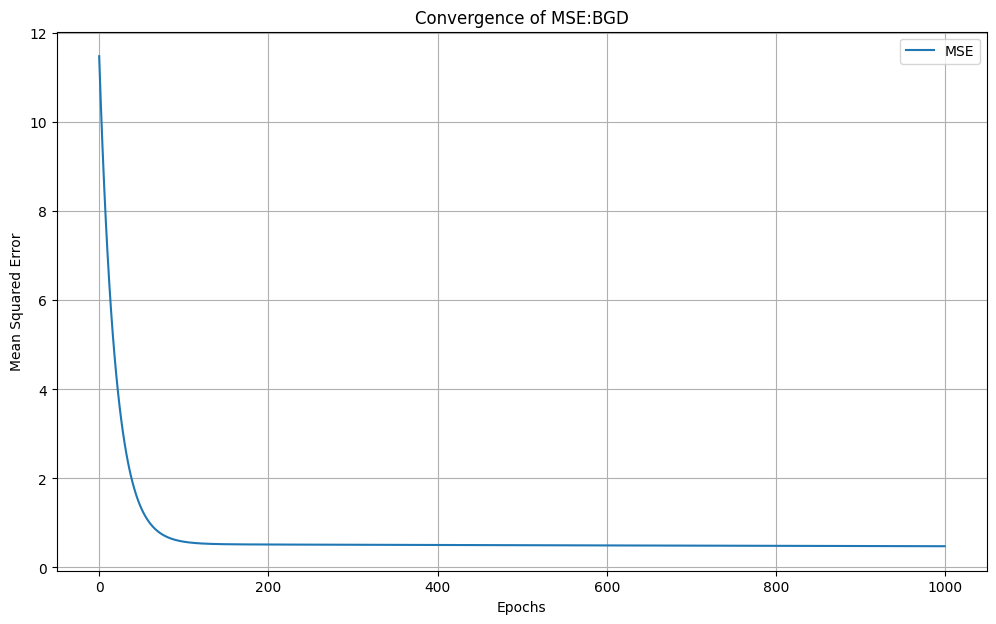

MSE of BGD while training:0.27224135905696883
MSE of BGD while testing:0.34781637293340023
-----------Stochastic Gradient Descent-----------


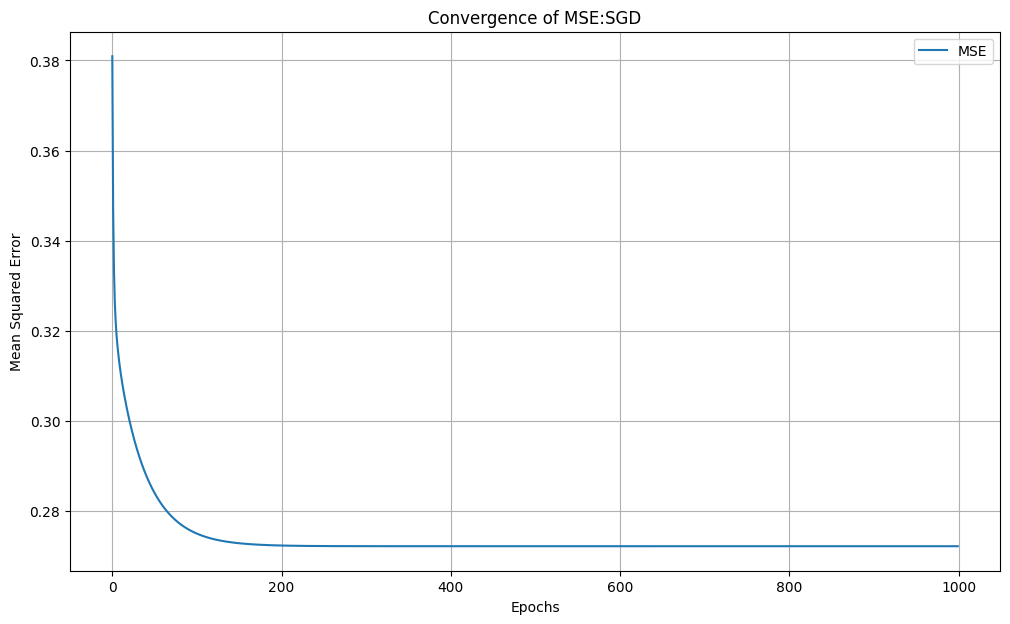

MSE of SGD while training:0.27224135905696883
MSE of SGD while testing:0.34781637293340023


In [9]:
# 模型初始化与训练
# 暂定学习率为0.01，epochs = 1000
learning_rate = 0.01
epochs = 1000

model1 = LinearRegressionModel(learning_rate, epochs, "analytical", "mse")
model2 = LinearRegressionModel(learning_rate, epochs, "batch", "mse")
model3 = LinearRegressionModel(learning_rate, epochs, "stochastic", "mse")

# 模型训练
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)



# 绘制训练时的MSE收敛曲线
print("-----------Analytical Method-----------")
print(
    "MSE of analytical method while training:{0}".format(
        model1.mse_loss(X_train, y_train)
    )
)
print(
    "MSE of analytical method while testing:{0}".format(model1.mse_loss(X_test, y_test))
)
print("-----------Batch Gradient Descent-----------")
plt.figure(figsize=(12, 7))
plt.plot(model2.mse_history, label="MSE")
plt.title("Convergence of MSE:BGD")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()
print("MSE of BGD while training:{0}".format(model2.mse_loss(X_train, y_train)))
print("MSE of BGD while testing:{0}".format(model2.mse_loss(X_test, y_test)))
print("-----------Stochastic Gradient Descent-----------")
plt.figure(figsize=(12, 7))
plt.plot(model3.mse_history, label="MSE")
plt.title("Convergence of MSE:SGD")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()
print("MSE of SGD while training:{0}".format(model3.mse_loss(X_train, y_train)))
print("MSE of SGD while testing:{0}".format(model3.mse_loss(X_test, y_test)))

### 结果分析 

* **解析法:** 

可以发现可能是由于数据量并不足够庞大,解析法在训练集上的结果很出众,甚至在**训练集上解析法也拿到了最低的MSE,将误差降到了最低。是三种方法中在测试集上表现最优异的。**
* **批量梯度下降:** 

可以看到批量梯度下降的结果在训练集上表现相当优异,但是测试集上表现并没非常好。**推测这可能是过拟合导致的问题,可以考虑调整超参数learning_rate与epoch进行优化**。但是时间可以发现其消耗时间最久,有待进一步通过并行进行优化加速。
* **随机梯度下降:** 

可以看到随机梯度下降的结果同样地也和BGD一样在训练集上表现相当优异,但也出现了**类似过拟合的结果**,证明初步的超参数探索仍有待改进空间。

##  超参数优化:寻找BGD与SGD的最优学习率
对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

* 根据实验模板中的提示,令学习率在3倍,10倍这样的进行尝试,因此一共设置了0.001到0.3一共6个组别;
* 选择最后一次模型训练时的MSE,这样最接近于模型训练后的结果;
* 查阅资料:用对数尺度可以更好地查看学习率的效果。

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:22<00:00, 12.13it/s]


<Figure size 1200x700 with 0 Axes>

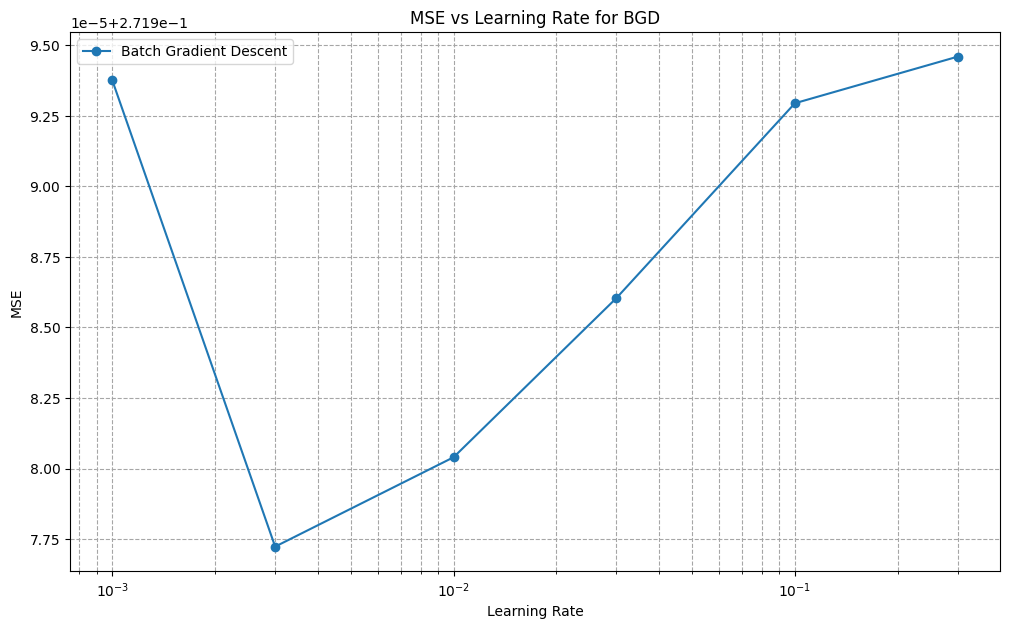

Best learning rate for BGD： 0.003


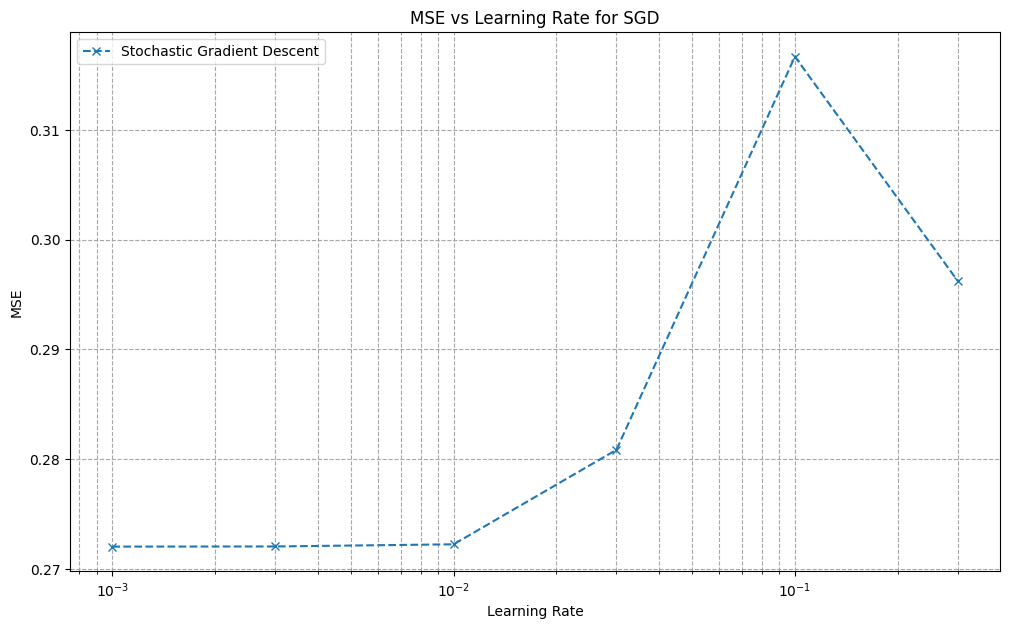

Best learning rate for SGD： 0.001


In [10]:
lr_optim_mse_batch = []
lr_optim_mse_sto = []
learning_rates = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]

# 对每个学习率进行训练
for lr in learning_rates:
    # BGD:
    model1 = LinearRegressionModel(lr, epochs, "batch", "mse")
    # SGD
    model2 = LinearRegressionModel(lr, epochs, "stochastic", "mse")
    model1.fit(X_train, y_train)  # 训练模型
    model2.fit(X_train, y_train)  # 训练模型
    lr_optim_mse_batch.append(model1.mse_history[-1])# 只取最后一次
    lr_optim_mse_sto.append(model2.mse_history[-1])


# BGD
plt.figure(figsize=(12, 7))
plt.plot(learning_rates, lr_optim_mse_batch, marker='o', linestyle='-', label='Batch Gradient Descent')
plt.xscale('log') # 对数尺度
plt.title('MSE vs Learning Rate for BGD')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.legend(loc="upper left")
plt.grid(True, which="both", ls="--", c='0.65')
plt.show()
lr_optim_batch = learning_rates[lr_optim_mse_batch.index(min(lr_optim_mse_batch))]
print("Best learning rate for BGD：", lr_optim_batch)

# SGD
plt.figure(figsize=(12, 7))
plt.plot(learning_rates, lr_optim_mse_sto, marker='x', linestyle='--', label='Stochastic Gradient Descent')
plt.xscale('log') # 对数尺度
plt.title('MSE vs Learning Rate for SGD')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.legend(loc="upper left")
plt.grid(True, which="both", ls="--", c='0.65')
plt.show()
lr_optim_sto = learning_rates[lr_optim_mse_sto.index(min(lr_optim_mse_sto))]
print("Best learning rate for SGD：", lr_optim_sto)

### 结果分析
* **批量梯度下降BGD：** 

可以看到批量梯度下降算法在模型训练完成后能够获得**非常低的均方误差（注意图左上角的标识1e-5，数量级与SGD不同）**。这是因为批量梯度下降每次都会用**总的样本来减少其总的预测代价，这样训练的模型更容易对训练数据量得到最优解，并更大程度上地降低误差**。

除此之外，注意到对于BGD，有一个**很明显的学习率过大或过小都会导致均方误差MSE变大的特征，这与理论实际相符合**，这是因为过小的学习率会使得模型收敛较慢；而过大的学习率可能又会导致算法发散无法找到最优解。

**最后还可以注意到BGD的均方误差最低时候的学习率在0.003。**

* **随机梯度下降SGD：**

可以看到随机梯度下降算法在**模型训练完成后的均方误差虽然没有BGD这么低，但仍然处于较好的水平。** 误差表现不如BGD，很有可能就是因为其获得的解不是最优解的原因。

**也可以注意到SGD的均方误差最低时候的学习率在0.001，是低于BGD的。** 推测这可能是因为两种方法每个epoch中针对于不同的样本数量进行预测代价的优化。批量梯度下降更注重准确性目的是找到全局最优解，故学习率偏大；而随机梯度下降找到的是局部最优解，但大大提升了时间性能，故学习率偏小。

## 3.2 中级要求
探究回归模型在机器学习和统计学上的差异。

本次实验中，通过以MSE为指标，分别实现了批量梯度下降和随机梯度下降的线性回归模型，我对机器学习的这个模型有了初步的认知。而对于统计学中回归模型，之前例如概率论等课程有过一些涉及，这里我通过查阅资料并结合自身体会说一些看法：

回归模型在机器学习和统计学中的应用虽然相似，但它们的目标和方法有所不同。

**目标的不同:**

* **机器学习:** 机器学习的主要目标是预测和分类。在回归模型中，机器学习**关注的是模型的泛化能力，即如何对未见过的数据做出准确的预测**。例如，在预测房价的问题中，机器学习模型可能会使用多种特征（如房屋面积、地理位置、建造年份等）来预测房价。这里的目标是使预测的房价尽可能接近实际的房价。**在本次实验中使用的就是红酒的各种不同角度的品质，比如pH等特征来进行的预测。**

* **统计学:** 统计学的目标是推断和解释。回归模型在统计学中常用于**解释自变量与因变量之间的关系，并评估模型参数的统计显著性**。在同样的问题中，统计学可能更关注哪些因素对房价影响最大，以及这些因素如何影响房价。例如，统计学可能会使用**假设检验**来确定地理位置是否对房价有显著影响。

**方法论的不同:**

* **机器学习:** 机器学习中，常常使用交叉验证、正则化等技巧来优化模型以提高其预测性能。本次实验中，**就主要使用了梯度下降（BGD与SGD）的方法进行模型的训练**。其他方法还有随机森林、神经网络等。

* **统计学:** 统计学强调假设检验、模型的假设前提（如线性关系、同方差性等）和参数估计的性质（如无偏性、一致性等）。在统计学中，可能会使用**最小二乘法、极大似然估计等方法**来估计模型参数。

**模型复杂性:**

* **机器学习:** 由于关心的是预测能力，机器学习模型往往更加复杂，如深度学习模型、复杂的集成方法等。深度学习模型就是一种非常复杂的机器学习模型，它可以处理非常复杂的数据结构，如图像、语音等。**但通常这却相反地大大地削弱了机器学习模型的可解释性，成为一个有待解决的关键问题。** 简单来说，就是不能够很好的解释为什么这些复杂的参数就能够预测成功，这难免会带来必要的担心。

* **统计学:** 统计模型通常更加简单和解释性强，旨在捕捉数据中的关键模式，并提供对这些模式的解释。**而本次实验就是基于统计学中的线性回归模型，相比之下，线性回归模型就是一种简单且易于解释的统计模型。**

**评估标准:**

* **机器学习:** 在分类问题中，我们可能会使用准确率、精确率、召回率、F1分数等指标来评估模型的性能。**本次实验中使用的是均方误差MSE来评估。**

* **统计学:** 除了关注预测误差，还会对模型的参数进行假设检验，评估参数的显著性，并计算置信区间。**在统计学中，我们可能会使用p值、置信区间等指标来评估参数的显著性。**

**数据的处理:**

* **机器学习:** 机器学习中，数据预处理、特征选择和特征工程是关键环节，这些步骤有如何处理数据以便于模型的训练和预测。**如本次实验使用的标准化、归一化以及去中心化等等预处理方法，目的也有很多且不同，比如统一不同指标的尺度，使数据分布的更加均匀等。同时使用的还有分层抽样方法。**

* **统计学:** 统计学中，数据的处理通常更为严谨和系统，包括数据的收集、清洗、变量的选择等步骤，以确保模型的假设前提得到满足。在统计学中，可能会进行**假设检验、异常值处理**等步骤来确保数据满足模型的假设。

总的来说，尽管回归模型在机器学习和统计学中都有广泛的应用，但由于两者的目标和方法论的不同，使得它们在实际应用中呈现出不同的特点。**机器学习注重模型的预测能力和泛化能力，而统计学则更注重对数据生成过程的理解和解释。** 这两个领域虽然有所不同，但它们之间也存在着许多交叉和互补，为我们提供了更全面、更深入理解数据和模型的可能性。


## 3.3 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

具体而言：

* **regularization_strength是岭回归的正则惩罚项**，默认值为1.0。实际上该超参数有待使用交叉验证的方式优化探索寻找最优值，其能很好地平衡模型的拟合程度和正则化项的贡献。

* 鉴于之前的实验中发现了可能是由于数据集的数量并不足够大，因此解析法获得了最低的均方误差。**故这里继续直接沿用解析法来编程实现岭回归算法。**

* 模型评价指标：**平均训练误差与平均测试误差**，计算模型预测值与实际值的平均平方误差。**同时针对于wine_quality数据集中由于之前分析结果，其取值在3-9之间，故同时计算理想值。** 并都绘制在一张图片里方便对比。

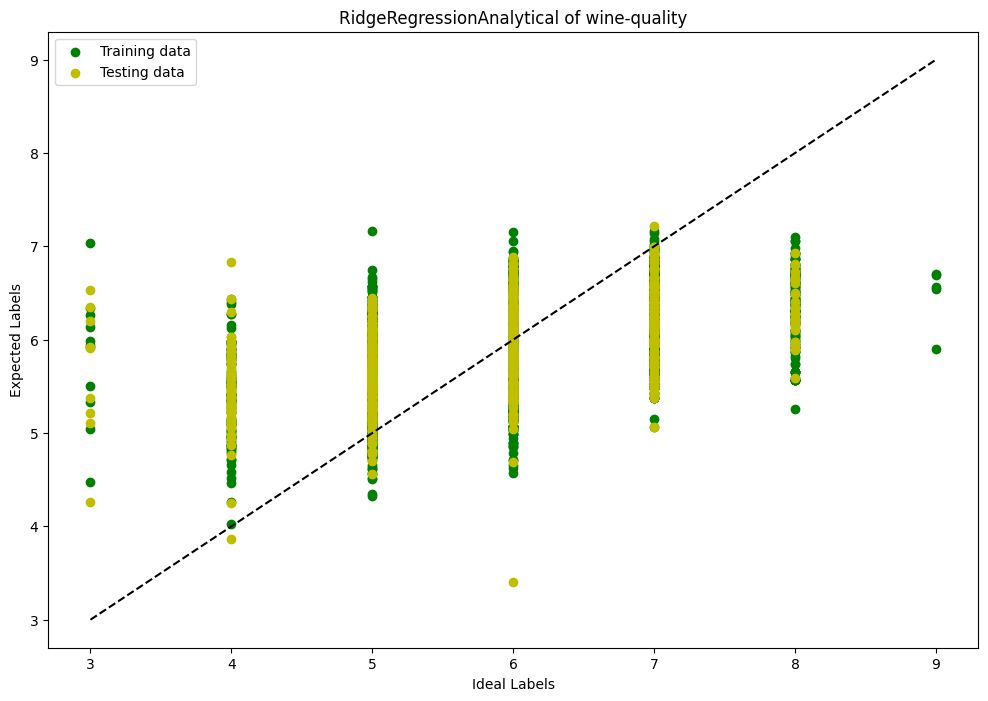

Training errors on average of RR_A: 0.27054094362322484
Testing errors on average of RR_A: 0.327406827349768


In [23]:
class RidgeRegressionAnalytical:
    def __init__(self, regularization_strength=1.0):
        """
        @param regularization_strength: alpha to regulate strength
        """
        self.regularization_strength = regularization_strength
        self.weights = None

    def fit(self, feature_matrix, target_vector):
        """
        @todo Training the model
        @param feature_matrix: 
        @param target_vector: 
        @return: 
        """
        I = np.eye(feature_matrix.shape[1])  
        self.weights = np.linalg.inv(feature_matrix.T @ feature_matrix + self.regularization_strength * I) @ feature_matrix.T @ target_vector

    def predict(self, feature_matrix):
        """
        @todo Predict labels
        @param feature_matrix: 
        @return: 
        """
        return feature_matrix @ self.weights

    def score(self, feature_matrix, target_vector):
        """
        @todo Accessing Model Capacity
        @param feature_matrix: 
        @param target_vector: 
        @return: 
        """
        predicted_target = self.predict(feature_matrix)
        error = np.mean(0.5*(predicted_target - target_vector) ** 2)
        return error

# 模型初始化与模型训练
regularization_strength = 0.1 # 正则化系数
model = RidgeRegressionAnalytical(regularization_strength=regularization_strength)
model.fit(X_train, y_train)

# 模型预测
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

# 计算平均误差
average_training_error = model.score(X_train, y_train)
average_testing_error = model.score(X_test, y_test)


plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_train_predicted, c='g', label='Training data')
plt.scatter(y_test, y_test_predicted, c='y', label='Testing data')
plt.plot([3, 9], [3, 9], 'k--')  # 理想情况下取值
plt.xlabel('Ideal Labels')
plt.ylabel('Expected Labels')
plt.title("RidgeRegressionAnalytical of wine-quality")
plt.legend()
plt.show()

print('Training errors on average of RR_A:', average_training_error)
print('Testing errors on average of RR_A:', average_testing_error)


#### 结果分析
可以发现使用解析法实现的岭回归算法能够具有较高的时间性能，并且其不论是在训练集还是测试集上都取得了较低的MSE误差，**证明了模型的成功与性能优异。**

### 实验总结
本次实验中，通过依次实现基础、中级以及高级三个阶段的要求，我实现了：
* **数据预处理：**

对数据的分布进行了简单的判断，在这之后使用实现的归一化、标准化和去中心化三种方式进行可视化对比，**最终决定使用使用归一化来进行预处理。**

除此之外，发现了数据集中各类别分布不均匀后，**在划分数据集时通过stratify参数实现了分层抽样。**

* **基础要求：**

**分别基于解析法，批量梯度下降，随机梯度下降三种优化方式，使用MSE均方误差，编写了基于wine_quality数据集且性能较优异的多元线性回归模型。** 并且模型有待进一步拓展和完善，采用了解耦和“机制与策略”的方式。

之后在实验模板的建议下，**3倍和10倍地对学习率进行探究，基于BGD和SGD两种方法，最后发现BGD最优学习率在0.003，SGD最优学习率在0.001。**

* **中级要求**

基于之前的实验，通过自己的理解与查阅资料，总结对比机器学习和统计学中回归模型的差异，发现其本质就具有一定区别。

* **高级要求**

基于之前均方误差最小的解析法编写了对应的岭回归模型，并且进行训练，**模型较成功且性能优异。**


## 误差分析

本次实验中在初步探索的过程中，设置learning_rate=1即第七组，在计算过程中出现了数值溢出，导致计算结果变成了inf（无穷大），然后在后续的计算中又变成了nan（不是一个数字）。

**这种情况通常发生在梯度下降的过程中，如果学习率设置得过大，或者数据没有进行适当的归一化，就可能导致每一步的更新过大，从而引发数值溢出。**

最终甚至导致了我内核的崩溃，必须重启。。。

## 改进方向
* BGD即批量梯度下降算法有待使用并行进行优化，提高其时间性能；
* 学习率有待进行更细致的微调；
* 岭回归算法有待实现BGD和SGD的优化，进行对比；
* 有待尝试使用其他损失函数而不仅是MSE探究对比。

## 实验心得和收获

* 本次实验中，我通过亲自编写数据预处理，对数据内容分布进行了探究，了解了不同的数据预处理方法并进行了实践；

* 对上课老师所讲的BGD和SGD的原理加深了理解，通过亲自实现网络，提高了我对网络架构的熟悉；

* 通过查阅资料，让我更深刻地体会到了机器学习和统计学的差异，并**也意识到机器学习的可解释性的重要性；**

* 最后编程实现岭回归也让我对该算法有个亲身的体会，增强了我的编程能力。

总的来说我收获颇丰，我会继续完善模型，加深我对相关网络和算法的理解和实现能力。